# Glove Embedding Visualization of Textually similar and Textually dissimilar duplicate bug reports

Installing the gensim package

In [1]:
!pip install gensim

In [2]:
import pickle
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

Downloading pretrained GloVe

In [3]:
glove_file = datapath('/content/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.txt")

In [4]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-04-08 15:58:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-08 15:58:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-08 15:58:18--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [5]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [6]:
import numpy as np
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [7]:
import pickle
pickle.dump({'embeddings_index' : embeddings_index } , open('/content/glove.6B.100d.txt', 'wb'))

In [8]:
from typing import List

In [9]:
MAX_TOKENS = 100
MAX_TITLE_LENGTH = 21
MAX_DESCRIPTION_LENGTH = 300
EMBEDDING_DIM = 100

Function for building a vocabulary

In [10]:
def build_vocab(sentences: List[str], sequence_length: int):
  vectorizer = TextVectorization(
    max_tokens=MAX_TOKENS - 2,
    output_sequence_length=sequence_length,
  )
  vectorizer.adapt(sentences)
  vocab = vectorizer.get_vocabulary()
  word_index = dict(zip(vocab, range(len(vocab))))

  return vectorizer, word_index

In [11]:
from keras.layers.preprocessing.text_vectorization import TextVectorization

# **ECLIPSE**

# Textually Similar

In [291]:
import pandas as pd

df_sim = pd.read_csv("Eclipse_Textually similar random 100.csv")
df_sim 

,Unnamed: 0,description1,description2,is_similar
0,0,created attachment screenshot of error pop...,created attachment video showing the issue...,0
1,1,the overwrite flag appears to not be worki...,exception in thread main org eclipse jgit ...,0
2,2,i m putting this in the git compononent b...,hello webmasters on tue jun at j...,0
3,3,a colleague experienced this when playing wi...,using jgit i ve had history view o...,1
4,4,created attachment class reproduces the pr...,created attachment failing test project o...,1
...,...,...,...,...
95,95,i use the nebula richtexteditor widget in my...,run configuration wizard launch superfluous ...,0
96,96,according to the microsoft style guide ...,i suggest using a shorter text in restart di...,1
97,97,created attachment prints hello i m havi...,going to the page gives application is not ...,0
98,98,in some cases the content assist does not p...,in the following example no proposals are sh...,1


In [292]:
df_sim = df_sim.drop(columns=['Unnamed: 0'])
df_sim

,description1,description2,is_similar
0,created attachment screenshot of error pop...,created attachment video showing the issue...,0
1,the overwrite flag appears to not be worki...,exception in thread main org eclipse jgit ...,0
2,i m putting this in the git compononent b...,hello webmasters on tue jun at j...,0
3,a colleague experienced this when playing wi...,using jgit i ve had history view o...,1
4,created attachment class reproduces the pr...,created attachment failing test project o...,1
...,...,...,...
95,i use the nebula richtexteditor widget in my...,run configuration wizard launch superfluous ...,0
96,according to the microsoft style guide ...,i suggest using a shorter text in restart di...,1
97,created attachment prints hello i m havi...,going to the page gives application is not ...,0
98,in some cases the content assist does not p...,in the following example no proposals are sh...,1


In [293]:
df_sim['Textual Similarity'] =  'Textually Similar'

In [294]:
df_sim

,description1,description2,is_similar,Textual Similarity
0,created attachment screenshot of error pop...,created attachment video showing the issue...,0,Textually Similar
1,the overwrite flag appears to not be worki...,exception in thread main org eclipse jgit ...,0,Textually Similar
2,i m putting this in the git compononent b...,hello webmasters on tue jun at j...,0,Textually Similar
3,a colleague experienced this when playing wi...,using jgit i ve had history view o...,1,Textually Similar
4,created attachment class reproduces the pr...,created attachment failing test project o...,1,Textually Similar
...,...,...,...,...
95,i use the nebula richtexteditor widget in my...,run configuration wizard launch superfluous ...,0,Textually Similar
96,according to the microsoft style guide ...,i suggest using a shorter text in restart di...,1,Textually Similar
97,created attachment prints hello i m havi...,going to the page gives application is not ...,0,Textually Similar
98,in some cases the content assist does not p...,in the following example no proposals are sh...,1,Textually Similar


In [295]:
import itertools

Building vocab and printing most frequent words from the vocab

In [296]:
descr_vectorizer, descr_word_index = build_vocab(
  [df_sim.description1, df_sim.description2],
  MAX_DESCRIPTION_LENGTH,
)

print(
  'Most frequent description words:',
  list(itertools.islice(descr_word_index.keys(), 5)),
)

Most frequent description words: ['', '[UNK]', 'eclipse', 'at', 'org']


In [297]:
from typing import List, Dict, Tuple, Set

Creating a word embedding of the description

In [298]:
def create_embedding_matrix(
  embeddings_index: Dict[str, np.ndarray],
  word_index: Dict[str, int],
  verbose=False,
):
  hits = 0
  misses = 0

  # prepare embedding matrix
  embedding_matrix = np.zeros((MAX_TOKENS, EMBEDDING_DIM))
  for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      # Words not found in embedding index will be all-zeros.
      # This includes the representation for "padding" and "OOV"
      embedding_matrix[i] = embedding_vector
      hits += 1
    else:
      misses += 1

  if verbose:
    print('Embedding shape:', embedding_matrix.shape)
    print(f'Found {hits} words, missed {misses}.')

  return embedding_matrix

In [299]:
print('Creating description embedding matrix:')
descr_embedding_matrix = create_embedding_matrix(
  embeddings_index, descr_word_index, True,
)

Creating description embedding matrix:
Embedding shape: (100, 100)
Found 92 words, missed 6.


In [300]:
descr_embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.44308999,  0.14926   ,  0.16649   , ...,  0.044676  ,
         0.139     , -0.10406   ],
       ...,
       [-0.61034   ,  0.60236001,  0.61764997, ..., -0.13958   ,
         0.72138   ,  0.52252001],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Using TSNE for reducing the dimensionality

In [301]:
from sklearn.manifold import TSNE

# Picking the top 100 points as TSNE takes a lot of time for 15K points
data_100 = descr_embedding_matrix[:100]
labels_100 = df_sim.is_similar

model = TSNE(n_components=2, random_state=0,perplexity = 50,n_iter=5000,metric='cosine')
# configuring the parameteres

tsne_data = model.fit_transform(data_100)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

In [303]:
tsne_data.shape

(100, 2)

In [304]:
sim_label = df_sim["Textual Similarity"]

In [305]:
tsne_data = np.vstack((tsne_data.T, sim_label)).T
tsne_df_sim = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","Textual_Similarity"))

In [306]:
tsne_df_sim

,Dim_1,Dim_2,Textual_Similarity
0,1.88738,-4.385794,Textually Similar
1,-0.350929,-4.695897,Textually Similar
2,1.706167,0.615549,Textually Similar
3,-0.597138,3.686055,Textually Similar
4,-0.694656,-0.843692,Textually Similar
...,...,...,...
95,-0.154547,-0.85576,Textually Similar
96,0.532251,4.136694,Textually Similar
97,0.164389,3.820898,Textually Similar
98,1.077017,-6.464872,Textually Similar


# Textually Dissimilar

In [307]:
df_dissim = pd.read_csv("Eclipse_Textually dissimilar random 100.csv")
# df_dissim = df_dissim[:50]
df_dissim

,Unnamed: 0,description1,description2,is_similar
0,0,bug introduces an eannotationvalidator wit...,the base package attribute of the genpackage...,1
1,1,bug introduces an eannotationvalidator wit...,marketplace website is slow and often timeou...,0
2,2,created attachment dannotation design zip ...,in manual refresh adding a dannotation on a...,1
3,3,i would like to discuss address two issues w...,steps to reproduce have multiple bundles ...,0
4,4,when a file which has enough data for horizo...,i cannot add an avatar image in fact i ca...,0
...,...,...,...,...
95,95,hi i ve seen it happen several times this ...,create an interface that looks like this p...,0
96,96,created attachment new incubation logo for...,the incubation egg uses the old logo it wou...,1
97,97,when doing the build at website console ...,bug introduced a synchronous layout call i...,0
98,98,created attachment broken quick search i ...,created attachment screenshot macos ...,1


In [308]:
df_dissim = df_dissim.drop(columns=['Unnamed: 0'])
df_dissim

,description1,description2,is_similar
0,bug introduces an eannotationvalidator wit...,the base package attribute of the genpackage...,1
1,bug introduces an eannotationvalidator wit...,marketplace website is slow and often timeou...,0
2,created attachment dannotation design zip ...,in manual refresh adding a dannotation on a...,1
3,i would like to discuss address two issues w...,steps to reproduce have multiple bundles ...,0
4,when a file which has enough data for horizo...,i cannot add an avatar image in fact i ca...,0
...,...,...,...
95,hi i ve seen it happen several times this ...,create an interface that looks like this p...,0
96,created attachment new incubation logo for...,the incubation egg uses the old logo it wou...,1
97,when doing the build at website console ...,bug introduced a synchronous layout call i...,0
98,created attachment broken quick search i ...,created attachment screenshot macos ...,1


In [309]:
df_dissim['Textual Similarity'] = 'Textually Dissimilar'

In [310]:
df_dissim

,description1,description2,is_similar,Textual Similarity
0,bug introduces an eannotationvalidator wit...,the base package attribute of the genpackage...,1,Textually Dissimilar
1,bug introduces an eannotationvalidator wit...,marketplace website is slow and often timeou...,0,Textually Dissimilar
2,created attachment dannotation design zip ...,in manual refresh adding a dannotation on a...,1,Textually Dissimilar
3,i would like to discuss address two issues w...,steps to reproduce have multiple bundles ...,0,Textually Dissimilar
4,when a file which has enough data for horizo...,i cannot add an avatar image in fact i ca...,0,Textually Dissimilar
...,...,...,...,...
95,hi i ve seen it happen several times this ...,create an interface that looks like this p...,0,Textually Dissimilar
96,created attachment new incubation logo for...,the incubation egg uses the old logo it wou...,1,Textually Dissimilar
97,when doing the build at website console ...,bug introduced a synchronous layout call i...,0,Textually Dissimilar
98,created attachment broken quick search i ...,created attachment screenshot macos ...,1,Textually Dissimilar


Building a vocab and creating a word embedding

In [311]:
descr_vectorizer, descr_word_index = build_vocab(
  [df_dissim.description1, df_dissim.description2],
  MAX_DESCRIPTION_LENGTH,
)

print(
  'Most frequent description words:',
  list(itertools.islice(descr_word_index.keys(), 5)),
)

Most frequent description words: ['', '[UNK]', 'eclipse', 'org', 'at']


In [312]:
def create_embedding_matrix(
  embeddings_index: Dict[str, np.ndarray],
  word_index: Dict[str, int],
  verbose=False,
):
  hits = 0
  misses = 0

  # prepare embedding matrix
  embedding_matrix = np.zeros((MAX_TOKENS, EMBEDDING_DIM))
  for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      # Words not found in embedding index will be all-zeros.
      # This includes the representation for "padding" and "OOV"
      embedding_matrix[i] = embedding_vector
      hits += 1
    else:
      misses += 1

  if verbose:
    print('Embedding shape:', embedding_matrix.shape)
    print(f'Found {hits} words, missed {misses}.')

  return embedding_matrix

In [313]:
print('Creating description embedding matrix:')
descr_embedding_matrix = create_embedding_matrix(
  embeddings_index, descr_word_index, True,
)

Creating description embedding matrix:
Embedding shape: (100, 100)
Found 92 words, missed 6.


In [314]:
descr_embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.44308999,  0.14926   ,  0.16649   , ...,  0.044676  ,
         0.139     , -0.10406   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Using TSNE for reducing the dimensionality

In [315]:
from sklearn.manifold import TSNE

# Picking the top 100 points as TSNE takes a lot of time for 15K points
data_100 = descr_embedding_matrix
labels_100 = df_dissim.is_similar

model = TSNE(n_components=2, random_state=0,perplexity = 50,n_iter=5000,metric='cosine')
# configuring the parameteres

tsne_data = model.fit_transform(data_100)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


In [316]:
dissim_label = df_dissim["Textual Similarity"]

In [317]:
tsne_data = np.vstack((tsne_data.T, dissim_label)).T
tsne_df_dissim = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","Textual_Similarity"))

In [318]:
tsne_df_dissim

,Dim_1,Dim_2,Textual_Similarity
0,-9.006751,6.66097,Textually Dissimilar
1,-6.879855,7.761356,Textually Dissimilar
2,-6.774136,2.931023,Textually Dissimilar
3,-5.433269,3.657582,Textually Dissimilar
4,-5.864247,-0.068348,Textually Dissimilar
...,...,...,...
95,-3.945481,2.693039,Textually Dissimilar
96,-5.521467,2.28388,Textually Dissimilar
97,-11.162223,5.424839,Textually Dissimilar
98,-2.46272,8.888266,Textually Dissimilar


Concatenating both the tsne tables of textually similar and dissimilar



In [319]:
complete_tsne_df = pd.concat([tsne_df_sim, tsne_df_dissim], ignore_index=True)
complete_tsne_df

,Dim_1,Dim_2,Textual_Similarity
0,1.88738,-4.385794,Textually Similar
1,-0.350929,-4.695897,Textually Similar
2,1.706167,0.615549,Textually Similar
3,-0.597138,3.686055,Textually Similar
4,-0.694656,-0.843692,Textually Similar
...,...,...,...
195,-3.945481,2.693039,Textually Dissimilar
196,-5.521467,2.28388,Textually Dissimilar
197,-11.162223,5.424839,Textually Dissimilar
198,-2.46272,8.888266,Textually Dissimilar


Using seaborn to visualize

In [320]:
import seaborn as sns

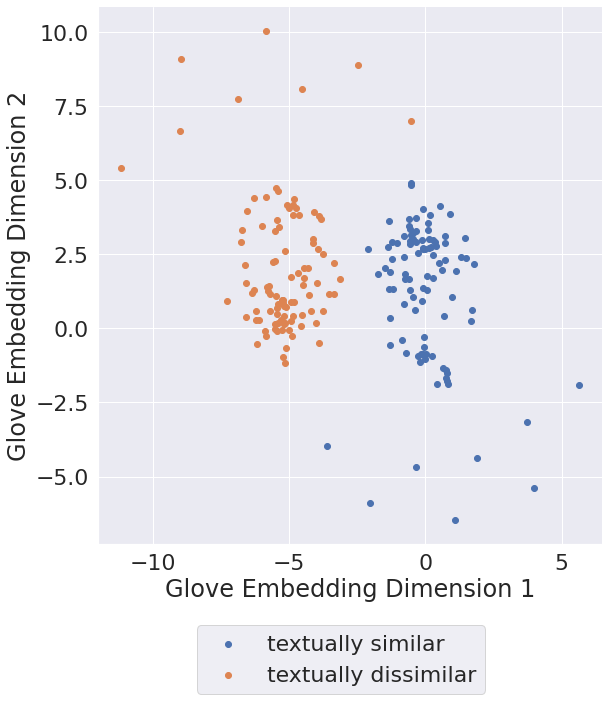

In [371]:
sns.set(font_scale = 2.0)
sns.FacetGrid(complete_tsne_df, hue="Textual_Similarity", height=9).map(plt.scatter, 'Dim_1', 'Dim_2')
# plt.figsize(50, 50)
plt.legend(labels=['textually similar', 'textually dissimilar'],bbox_to_anchor=(0.79, -0.13))
# plt.title('Scatter Plot of Glove Embedding of Textually Similar Data')
plt.xlabel('Glove Embedding Dimension 1')
plt.ylabel('Glove Embedding Dimension 2')
# plt.legend()
# plt.setp(sns.patches, linewidth=0)
plt.savefig('textually-similarity-based-tsne-eclipse.jpg',bbox_inches = 'tight')
plt.show()

# **FIREFOX**

# Textually Similar

In [262]:
firefox_df_sim = pd.read_csv("Firefox_siamese_textually_similar_test_duplicates.csv")

In [263]:
firefox_df_sim = firefox_df_sim.drop(columns=["Unnamed: 0"])

In [264]:
firefox_df_sim_100 = firefox_df_sim.sample(n=100)
firefox_df_sim_100

,description1,description2,is_similar
1027,setting extensions pocket enabled preferen...,filed by cbrindusan at mozilla com jo...,0
1058,i shit a brick when i opened bing com in a p...,created attachment screenshot from ...,0
243,filed by cbook at mozilla com job id ...,str enable containers in about config ...,1
788,created attachment aboutff jpg user agent...,created attachment screenshot this rule f...,1
1344,created attachment screenshot of problem ...,i just installed nightly on a windows lapt...,1
...,...,...,...
994,user agent mozilla applewebkit ...,created attachment screen shot at ...,0
1289,created attachment download panel png use...,user agent mozilla gecko firefox ...,0
697,bug implemented a new library button the ...,though we create a scrollbar the cut off...,1
812,created attachment jpg load issues ...,str enable bookmark toolbar press ext...,0


In [265]:
firefox_df_sim_100 = firefox_df_sim_100.reset_index(drop=True)
firefox_df_sim_100

,description1,description2,is_similar
0,setting extensions pocket enabled preferen...,filed by cbrindusan at mozilla com jo...,0
1,i shit a brick when i opened bing com in a p...,created attachment screenshot from ...,0
2,filed by cbook at mozilla com job id ...,str enable containers in about config ...,1
3,created attachment aboutff jpg user agent...,created attachment screenshot this rule f...,1
4,created attachment screenshot of problem ...,i just installed nightly on a windows lapt...,1
...,...,...,...
95,user agent mozilla applewebkit ...,created attachment screen shot at ...,0
96,created attachment download panel png use...,user agent mozilla gecko firefox ...,0
97,bug implemented a new library button the ...,though we create a scrollbar the cut off...,1
98,created attachment jpg load issues ...,str enable bookmark toolbar press ext...,0


In [266]:
firefox_df_sim_100['Textual Similarity'] = 'Textually Similar'

In [267]:
firefox_df_sim_100

,description1,description2,is_similar,Textual Similarity
0,setting extensions pocket enabled preferen...,filed by cbrindusan at mozilla com jo...,0,Textually Similar
1,i shit a brick when i opened bing com in a p...,created attachment screenshot from ...,0,Textually Similar
2,filed by cbook at mozilla com job id ...,str enable containers in about config ...,1,Textually Similar
3,created attachment aboutff jpg user agent...,created attachment screenshot this rule f...,1,Textually Similar
4,created attachment screenshot of problem ...,i just installed nightly on a windows lapt...,1,Textually Similar
...,...,...,...,...
95,user agent mozilla applewebkit ...,created attachment screen shot at ...,0,Textually Similar
96,created attachment download panel png use...,user agent mozilla gecko firefox ...,0,Textually Similar
97,bug implemented a new library button the ...,though we create a scrollbar the cut off...,1,Textually Similar
98,created attachment jpg load issues ...,str enable bookmark toolbar press ext...,0,Textually Similar


In [268]:
MAX_TOKENS = 100
MAX_TITLE_LENGTH = 21
MAX_DESCRIPTION_LENGTH = 300
EMBEDDING_DIM = 100

Building a vocab and creating a word embedding of the descriptions

In [269]:
descr_vectorizer, descr_word_index = build_vocab(
  [firefox_df_sim_100.description1, firefox_df_sim_100.description2],
  MAX_DESCRIPTION_LENGTH,
)

print(
  'Most frequent description words:',
  list(itertools.islice(descr_word_index.keys(), 5)),
)

Most frequent description words: ['', '[UNK]', 'info', 'browser', 'test']


In [270]:
def create_embedding_matrix(
  embeddings_index: Dict[str, np.ndarray],
  word_index: Dict[str, int],
  verbose=False,
):
  hits = 0
  misses = 0

  # prepare embedding matrix
  embedding_matrix = np.zeros((MAX_TOKENS, EMBEDDING_DIM))
  for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      # Words not found in embedding index will be all-zeros.
      # This includes the representation for "padding" and "OOV"
      embedding_matrix[i] = embedding_vector
      hits += 1
    else:
      misses += 1

  if verbose:
    print('Embedding shape:', embedding_matrix.shape)
    print(f'Found {hits} words, missed {misses}.')

  return embedding_matrix

In [271]:
print('Creating description embedding matrix:')
descr_embedding_matrix = create_embedding_matrix(
  embeddings_index, descr_word_index, True,
)

Creating description embedding matrix:
Embedding shape: (100, 100)
Found 94 words, missed 4.


In [272]:
descr_embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.81967002, -0.14202   ,  0.64740998, ..., -0.55650997,
         0.34254   ,  0.29034999],
       ...,
       [ 0.25479001, -0.13097   ,  0.11326   , ...,  0.11979   ,
        -0.38018   ,  0.061187  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Using TSNE to reduce the dimensionality

In [273]:
from sklearn.manifold import TSNE

# Picking the top 100 points as TSNE takes a lot of time for 15K points
data_100 = descr_embedding_matrix
# labels_100 = df_dissim.is_similar

model = TSNE(n_components=2, random_state=0,perplexity = 50,n_iter=5000,metric='cosine')
# configuring the parameteres

tsne_data = model.fit_transform(data_100)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


In [274]:
firefox_sim_label = firefox_df_sim_100["Textual Similarity"]

In [275]:
tsne_data = np.vstack((tsne_data.T, firefox_sim_label)).T
tsne_df_sim_firefox = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","Textual_Similarity"))

In [276]:
tsne_df_sim_firefox

,Dim_1,Dim_2,Textual_Similarity
0,-3.890193,-1.407155,Textually Similar
1,5.803288,-1.950577,Textually Similar
2,0.950366,3.558537,Textually Similar
3,0.432948,3.319206,Textually Similar
4,2.355501,7.504482,Textually Similar
...,...,...,...
95,-0.03089,6.738223,Textually Similar
96,-1.063182,2.929892,Textually Similar
97,0.273138,2.247189,Textually Similar
98,-0.275438,-2.625635,Textually Similar


# Textually Dissimilar

In [277]:
firefox_df_dissim = pd.read_csv("Firefox_siamese_textually_dissimilar_test_duplicates.csv")
# df_dissim = df_dissim[:50]
firefox_df_dissim

,Unnamed: 0,description1,description2,is_similar
0,0,user agent mozilla gecko firefox ...,user agent mozilla gecko buil...,1
1,1,affected versions nightly bu...,created attachment troubleshoot mode mov ...,0
2,2,user agent mozilla gecko firefox ...,user agent mozilla gecko firefox ...,0
3,3,created attachment ff with ellipsis menu...,created attachment screen shot at ...,1
4,4,user agent mozilla gecko firefox ...,created attachment screen shot at ...,0
...,...,...,...,...
1499,1509,user agent mozilla gecko firefox ...,let s move the library window to a tab ...,1
1500,1510,created attachment normandy events gif a...,created attachment screenshot load ...,0
1501,1511,user agent mozilla gecko firefox ...,mozilla gecko firefox id cset ...,0
1502,1512,created attachment bookmark dropdown webm ...,created attachment drop down gif affecte...,1


In [278]:
firefox_df_dissim = firefox_df_dissim.drop(columns = ["Unnamed: 0"])
firefox_df_dissim

,description1,description2,is_similar
0,user agent mozilla gecko firefox ...,user agent mozilla gecko buil...,1
1,affected versions nightly bu...,created attachment troubleshoot mode mov ...,0
2,user agent mozilla gecko firefox ...,user agent mozilla gecko firefox ...,0
3,created attachment ff with ellipsis menu...,created attachment screen shot at ...,1
4,user agent mozilla gecko firefox ...,created attachment screen shot at ...,0
...,...,...,...
1499,user agent mozilla gecko firefox ...,let s move the library window to a tab ...,1
1500,created attachment normandy events gif a...,created attachment screenshot load ...,0
1501,user agent mozilla gecko firefox ...,mozilla gecko firefox id cset ...,0
1502,created attachment bookmark dropdown webm ...,created attachment drop down gif affecte...,1


In [279]:
firefox_df_dissim_100 = firefox_df_dissim.sample(n=100)
firefox_df_dissim_100

,description1,description2,is_similar
620,ff bit this is simple to see but d...,created attachment image mtzip jpg user a...,1
704,created attachment screenshot on at ...,user agent mozilla gecko firefox ...,0
757,user agent mozilla applewebkit ...,user agent mozilla applewebkit ...,0
469,user agent mozilla gecko firefox ...,user agent mozilla gecko firefox ...,0
1447,user agent mozilla gecko firefox ...,user agent mozilla gecko firefox ...,0
...,...,...,...
1379,created attachment screenshot of jsfiddle ...,this is needed to fix bug the idea is ...,1
832,user agent mozilla gecko firefox ...,user agent mozilla gecko firefox ...,0
1254,created attachment screenshot png ...,created attachment overlapping decks the ...,1
414,note when the user has voiceover activ...,user agent mozilla gecko firefox ...,0


In [280]:
firefox_df_dissim_100['Textual Similarity'] = 'Textually Dissimilar'

In [281]:
firefox_df_dissim_100

,description1,description2,is_similar,Textual Similarity
620,ff bit this is simple to see but d...,created attachment image mtzip jpg user a...,1,Textually Dissimilar
704,created attachment screenshot on at ...,user agent mozilla gecko firefox ...,0,Textually Dissimilar
757,user agent mozilla applewebkit ...,user agent mozilla applewebkit ...,0,Textually Dissimilar
469,user agent mozilla gecko firefox ...,user agent mozilla gecko firefox ...,0,Textually Dissimilar
1447,user agent mozilla gecko firefox ...,user agent mozilla gecko firefox ...,0,Textually Dissimilar
...,...,...,...,...
1379,created attachment screenshot of jsfiddle ...,this is needed to fix bug the idea is ...,1,Textually Dissimilar
832,user agent mozilla gecko firefox ...,user agent mozilla gecko firefox ...,0,Textually Dissimilar
1254,created attachment screenshot png ...,created attachment overlapping decks the ...,1,Textually Dissimilar
414,note when the user has voiceover activ...,user agent mozilla gecko firefox ...,0,Textually Dissimilar


Building a vocab and creating word embedding of the description

In [282]:
descr_vectorizer, descr_word_index = build_vocab(
  [firefox_df_dissim_100.description1, firefox_df_dissim_100.description2],
  MAX_DESCRIPTION_LENGTH,
)

print(
  'Most frequent description words:',
  list(itertools.islice(descr_word_index.keys(), 5)),
)

Most frequent description words: ['', '[UNK]', 'the', 'to', 'a']


In [283]:
def create_embedding_matrix(
  embeddings_index: Dict[str, np.ndarray],
  word_index: Dict[str, int],
  verbose=False,
):
  hits = 0
  misses = 0

  # prepare embedding matrix
  embedding_matrix = np.zeros((MAX_TOKENS, EMBEDDING_DIM))
  for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      # Words not found in embedding index will be all-zeros.
      # This includes the representation for "padding" and "OOV"
      embedding_matrix[i] = embedding_vector
      hits += 1
    else:
      misses += 1

  if verbose:
    print('Embedding shape:', embedding_matrix.shape)
    print(f'Found {hits} words, missed {misses}.')

  return embedding_matrix

In [284]:
print('Creating description embedding matrix:')
descr_embedding_matrix = create_embedding_matrix(
  embeddings_index, descr_word_index, True,
)

Creating description embedding matrix:
Embedding shape: (100, 100)
Found 96 words, missed 2.


In [285]:
descr_embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       ...,
       [-0.013767  ,  0.33247   ,  0.59895003, ..., -0.67427999,
         0.51494998,  0.34287   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Using TSNE to reduce the dimensionality

In [286]:
from sklearn.manifold import TSNE

# Picking the top 100 points as TSNE takes a lot of time for 15K points
data_100 = descr_embedding_matrix
# labels_100 = df_dissim.is_similar

model = TSNE(n_components=2, random_state=0,perplexity = 50,n_iter=5000,metric='cosine')
# configuring the parameteres

tsne_data = model.fit_transform(data_100)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


In [287]:
firefox_dissim_label = firefox_df_dissim_100["Textual Similarity"]

In [288]:
tsne_data = np.vstack((tsne_data.T, firefox_dissim_label)).T
tsne_df_dissim_firefox = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","Textual_Similarity"))

Concatenating both the tsne tables for textually similar and dissimilar

In [289]:
complete_tsne_df_firefox = pd.concat([tsne_df_sim_firefox, tsne_df_dissim_firefox], ignore_index=True)
complete_tsne_df_firefox

,Dim_1,Dim_2,Textual_Similarity
0,-3.890193,-1.407155,Textually Similar
1,5.803288,-1.950577,Textually Similar
2,0.950366,3.558537,Textually Similar
3,0.432948,3.319206,Textually Similar
4,2.355501,7.504482,Textually Similar
...,...,...,...
195,-1.226562,-1.3665,Textually Dissimilar
196,-3.05373,0.1832,Textually Dissimilar
197,0.311406,-1.805834,Textually Dissimilar
198,-13.029888,1.26928,Textually Dissimilar


Using seaborn to visualize it

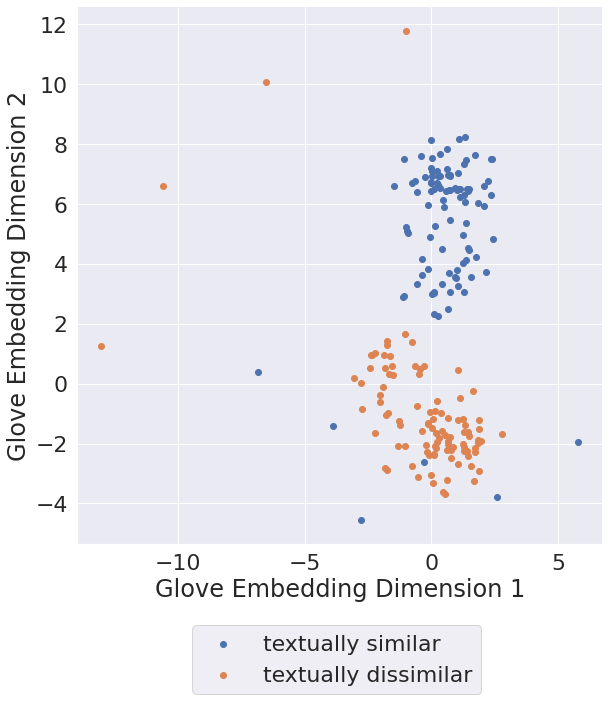

In [370]:
sns.set(font_scale = 2.0)
# sns.set(fontsize=15)
sns.FacetGrid(complete_tsne_df_firefox, hue="Textual_Similarity", height=9).map(plt.scatter, 'Dim_1', 'Dim_2')
# plt.figsize(50, 50)
plt.legend(labels=['textually similar', 'textually dissimilar'],bbox_to_anchor=(0.79, -0.13))
# plt.title('Scatter Plot of Glove Embedding of Textually Similar Data')
plt.xlabel('Glove Embedding Dimension 1')
plt.ylabel('Glove Embedding Dimension 2')
# plt.legend()
plt.savefig('textually-similarity-based-tsne-firefox.jpg',bbox_inches = 'tight')
plt.show()